📂 Found 176 episode logs. Processing...

✅ Graph saved as 'final_learning_evolution.png'
Open this image to see your agent's entire history!


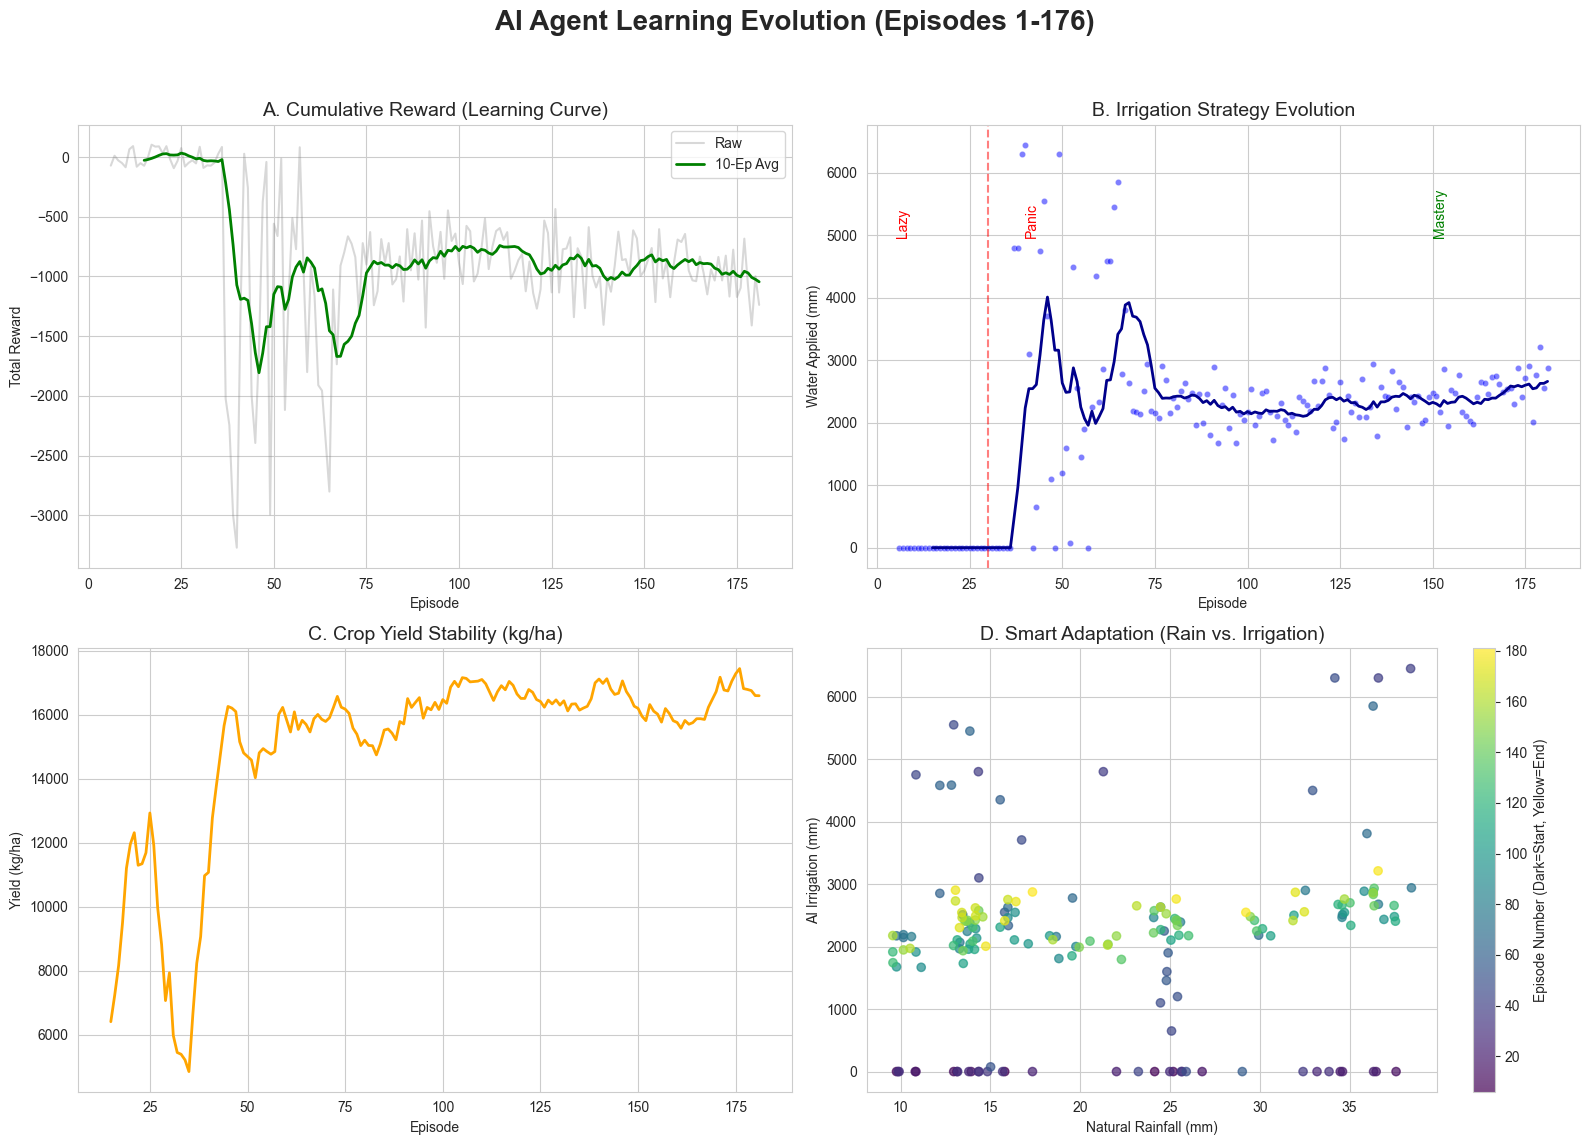

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# --- CONFIGURATION ---
LOG_DIR = r"D:\Final-Year-Project\VERSION-ONE-next\randomized_env_workspace\episode_final"  # Path to your logs
OUTPUT_IMAGE = "final_learning_evolution.png"

def generate_report():
    # 1. Find all log files
    search_path = os.path.join(LOG_DIR, "episode_*_log.csv")
    files = sorted(glob.glob(search_path))
    
    if not files:
        print(f"❌ No log files found in {LOG_DIR}")
        return

    print(f"📂 Found {len(files)} episode logs. Processing...")

    # 2. Extract Data
    data = []
    for f in files:
        try:
            # Extract episode number from filename (e.g., episode_0150_log.csv)
            ep_num = int(os.path.basename(f).split('_')[1])
            
            df = pd.read_csv(f)
            
            # Key Metrics
            total_rain = df['rainfall_7day'].mean() # Approx total rain proxy
            total_irrigation = df['action_irrigation_mm'].sum()
            final_yield = df['total_biomass'].max()
            total_reward = df['reward'].sum()
            
            # Efficiency (Yield per unit of water)
            total_water = total_irrigation + total_rain
            efficiency = final_yield / total_water if total_water > 0 else 0

            data.append({
                'Episode': ep_num,
                'Rain (mm)': total_rain,
                'Irrigation (mm)': total_irrigation,
                'Yield (kg/ha)': final_yield,
                'Reward': total_reward,
                'Efficiency': efficiency
            })
        except Exception as e:
            print(f"⚠️ Error reading {f}: {e}")

    # Create DataFrame and Sort
    df_all = pd.DataFrame(data).sort_values('Episode')

    # 3. Calculate Rolling Averages (To smooth out the noise)
    window = 10
    df_all['Reward_Smooth'] = df_all['Reward'].rolling(window=window).mean()
    df_all['Irrigation_Smooth'] = df_all['Irrigation (mm)'].rolling(window=window).mean()
    df_all['Yield_Smooth'] = df_all['Yield (kg/ha)'].rolling(window=window).mean()

    # 4. Generate the 4-Panel Dashboard
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'AI Agent Learning Evolution (Episodes 1-{len(df_all)})', fontsize=20, weight='bold')

    # Panel A: The Reward Curve (Did it learn?)
    sns.lineplot(data=df_all, x='Episode', y='Reward', ax=axes[0, 0], alpha=0.3, color='gray', label='Raw')
    sns.lineplot(data=df_all, x='Episode', y='Reward_Smooth', ax=axes[0, 0], color='green', linewidth=2, label='10-Ep Avg')
    axes[0, 0].set_title('A. Cumulative Reward (Learning Curve)', fontsize=14)
    axes[0, 0].set_ylabel('Total Reward')
    axes[0, 0].legend()

    # Panel B: Water Usage (The Behavior Shift)
    sns.scatterplot(data=df_all, x='Episode', y='Irrigation (mm)', ax=axes[0, 1], alpha=0.5, color='blue', s=20)
    sns.lineplot(data=df_all, x='Episode', y='Irrigation_Smooth', ax=axes[0, 1], color='darkblue', linewidth=2)
    axes[0, 1].set_title('B. Irrigation Strategy Evolution', fontsize=14)
    axes[0, 1].set_ylabel('Water Applied (mm)')
    # Mark the phases
    axes[0, 1].axvline(30, color='r', linestyle='--', alpha=0.5)
    axes[0, 1].text(5, 5000, "Lazy", rotation=90, color='r')
    axes[0, 1].text(40, 5000, "Panic", rotation=90, color='r')
    axes[0, 1].text(150, 5000, "Mastery", rotation=90, color='g')

    # Panel C: Yield Stability (The Result)
    sns.lineplot(data=df_all, x='Episode', y='Yield_Smooth', ax=axes[1, 0], color='orange', linewidth=2)
    axes[1, 0].set_title('C. Crop Yield Stability (kg/ha)', fontsize=14)
    axes[1, 0].set_ylabel('Yield (kg/ha)')

    # Panel D: Intelligence Test (Rain vs Irrigation)
    # Does the agent use LESS irrigation when there is MORE rain?
    sc = axes[1, 1].scatter(df_all['Rain (mm)'], df_all['Irrigation (mm)'], 
                            c=df_all['Episode'], cmap='viridis', alpha=0.7)
    axes[1, 1].set_title('D. Smart Adaptation (Rain vs. Irrigation)', fontsize=14)
    axes[1, 1].set_xlabel('Natural Rainfall (mm)')
    axes[1, 1].set_ylabel('AI Irrigation (mm)')
    plt.colorbar(sc, ax=axes[1, 1], label='Episode Number (Dark=Start, Yellow=End)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(OUTPUT_IMAGE)
    print(f"\n✅ Graph saved as '{OUTPUT_IMAGE}'")
    print("Open this image to see your agent's entire history!")

if __name__ == "__main__":
    generate_report()

📂 Found 176 episode logs. Processing...

✅ Graph saved as 'final_learning_evolution.png'
Open this image to see your agent's entire history!


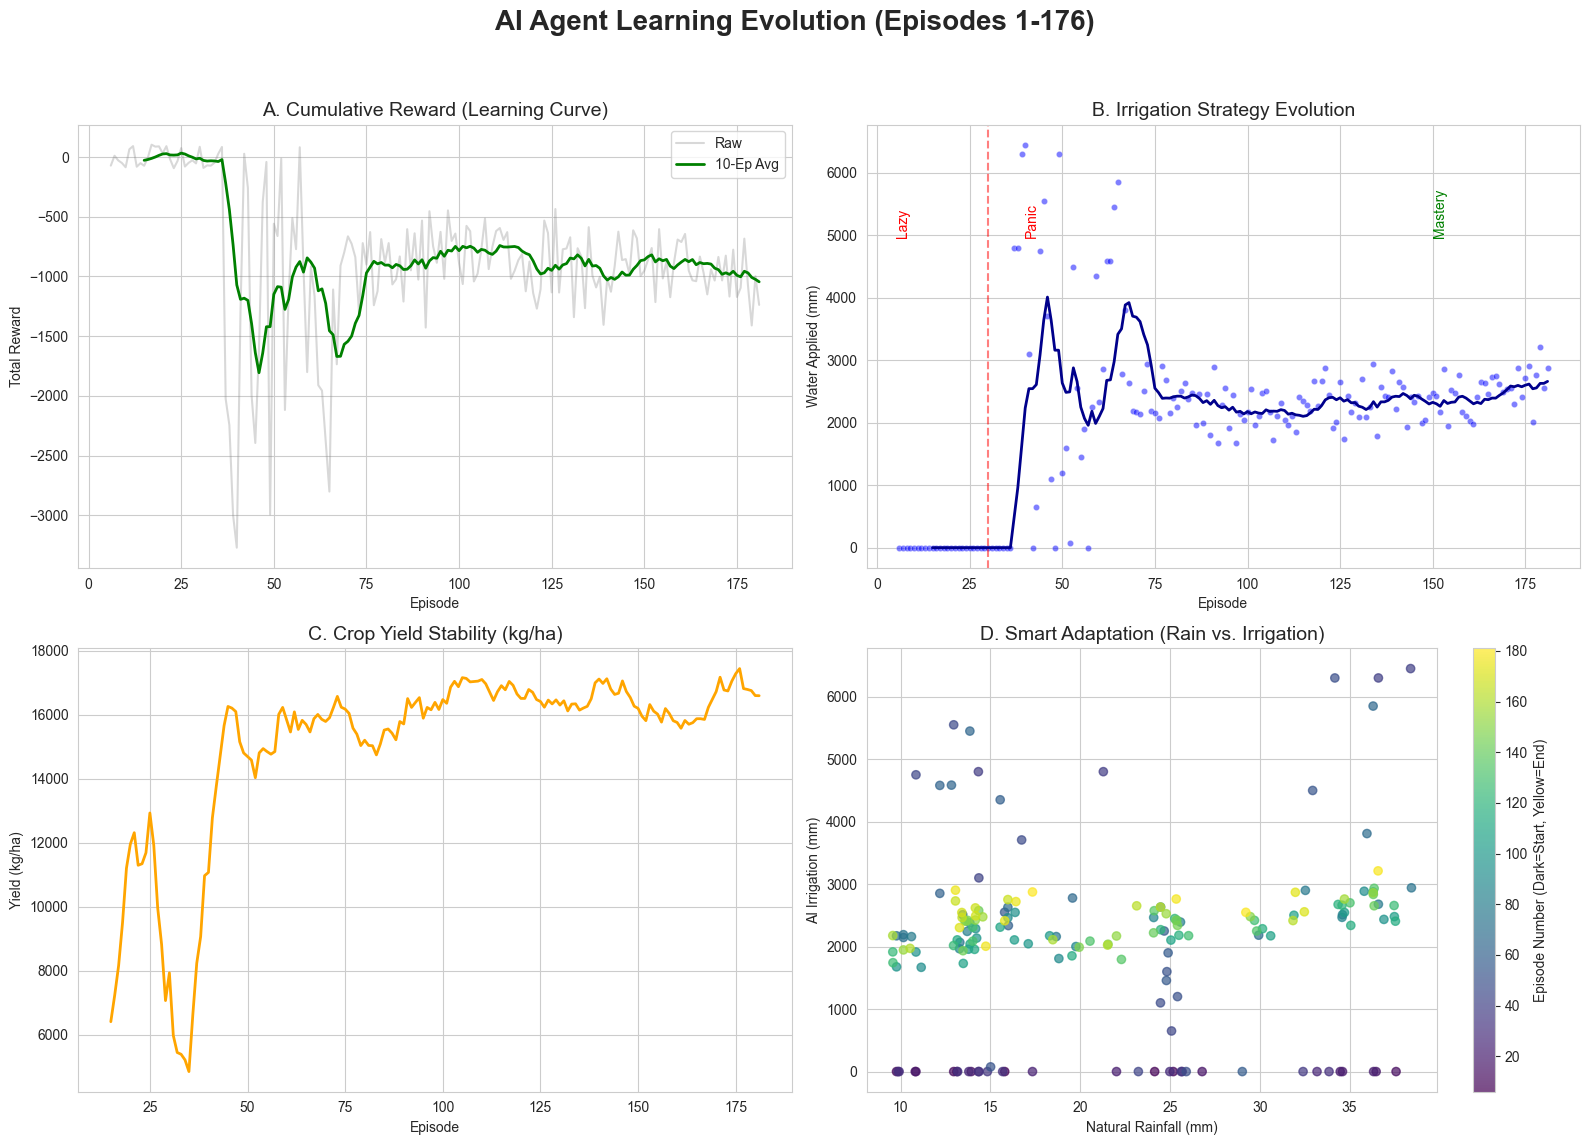

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# --- CONFIGURATION ---
LOG_DIR = r"D:\Final-Year-Project\VERSION-ONE-next\randomized_env_workspace\episode_final"  # Path to your logs
OUTPUT_IMAGE = "final_learning_evolution.png"

def generate_report():
    # 1. Find all log files
    search_path = os.path.join(LOG_DIR, "episode_*_log.csv")
    files = sorted(glob.glob(search_path))
    
    if not files:
        print(f"❌ No log files found in {LOG_DIR}")
        return

    print(f"📂 Found {len(files)} episode logs. Processing...")

    # 2. Extract Data
    data = []
    for f in files:
        try:
            # Extract episode number from filename (e.g., episode_0150_log.csv)
            ep_num = int(os.path.basename(f).split('_')[1])
            
            df = pd.read_csv(f)
            
            # Key Metrics
            total_rain = df['rainfall_7day'].mean() # Approx total rain proxy
            total_irrigation = df['action_irrigation_mm'].sum()
            final_yield = df['total_biomass'].max()
            total_reward = df['reward'].sum()
            
            # Efficiency (Yield per unit of water)
            total_water = total_irrigation + total_rain
            efficiency = final_yield / total_water if total_water > 0 else 0

            data.append({
                'Episode': ep_num,
                'Rain (mm)': total_rain,
                'Irrigation (mm)': total_irrigation,
                'Yield (kg/ha)': final_yield,
                'Reward': total_reward,
                'Efficiency': efficiency
            })
        except Exception as e:
            print(f"⚠️ Error reading {f}: {e}")

    # Create DataFrame and Sort
    df_all = pd.DataFrame(data).sort_values('Episode')

    # 3. Calculate Rolling Averages (To smooth out the noise)
    window = 10
    df_all['Reward_Smooth'] = df_all['Reward'].rolling(window=window).mean()
    df_all['Irrigation_Smooth'] = df_all['Irrigation (mm)'].rolling(window=window).mean()
    df_all['Yield_Smooth'] = df_all['Yield (kg/ha)'].rolling(window=window).mean()

    # 4. Generate the 4-Panel Dashboard
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'AI Agent Learning Evolution (Episodes 1-{len(df_all)})', fontsize=20, weight='bold')

    # Panel A: The Reward Curve (Did it learn?)
    sns.lineplot(data=df_all, x='Episode', y='Reward', ax=axes[0, 0], alpha=0.3, color='gray', label='Raw')
    sns.lineplot(data=df_all, x='Episode', y='Reward_Smooth', ax=axes[0, 0], color='green', linewidth=2, label='10-Ep Avg')
    axes[0, 0].set_title('A. Cumulative Reward (Learning Curve)', fontsize=14)
    axes[0, 0].set_ylabel('Total Reward')
    axes[0, 0].legend()

    # Panel B: Water Usage (The Behavior Shift)
    sns.scatterplot(data=df_all, x='Episode', y='Irrigation (mm)', ax=axes[0, 1], alpha=0.5, color='blue', s=20)
    sns.lineplot(data=df_all, x='Episode', y='Irrigation_Smooth', ax=axes[0, 1], color='darkblue', linewidth=2)
    axes[0, 1].set_title('B. Irrigation Strategy Evolution', fontsize=14)
    axes[0, 1].set_ylabel('Water Applied (mm)')
    # Mark the phases
    axes[0, 1].axvline(30, color='r', linestyle='--', alpha=0.5)
    axes[0, 1].text(5, 5000, "Lazy", rotation=90, color='r')
    axes[0, 1].text(40, 5000, "Panic", rotation=90, color='r')
    axes[0, 1].text(150, 5000, "Mastery", rotation=90, color='g')

    # Panel C: Yield Stability (The Result)
    sns.lineplot(data=df_all, x='Episode', y='Yield_Smooth', ax=axes[1, 0], color='orange', linewidth=2)
    axes[1, 0].set_title('C. Crop Yield Stability (kg/ha)', fontsize=14)
    axes[1, 0].set_ylabel('Yield (kg/ha)')

    # Panel D: Intelligence Test (Rain vs Irrigation)
    # Does the agent use LESS irrigation when there is MORE rain?
    sc = axes[1, 1].scatter(df_all['Rain (mm)'], df_all['Irrigation (mm)'], 
                            c=df_all['Episode'], cmap='viridis', alpha=0.7)
    axes[1, 1].set_title('D. Smart Adaptation (Rain vs. Irrigation)', fontsize=14)
    axes[1, 1].set_xlabel('Natural Rainfall (mm)')
    axes[1, 1].set_ylabel('AI Irrigation (mm)')
    plt.colorbar(sc, ax=axes[1, 1], label='Episode Number (Dark=Start, Yellow=End)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(OUTPUT_IMAGE)
    print(f"\n✅ Graph saved as '{OUTPUT_IMAGE}'")
    print("Open this image to see your agent's entire history!")

if __name__ == "__main__":
    generate_report()

📂 Found 176 log files. Processing...
🎬 Generating GIF (176 frames)...


C:\Users\gurup\AppData\Local\Temp\ipykernel_35136\4001192885.py:141: UserWarning: You passed in an explicit save_count=176 which is being ignored in favor of frames=176.
  ani = animation.FuncAnimation(


✅ Success! Animation saved to: agent_learning_evolution.gif


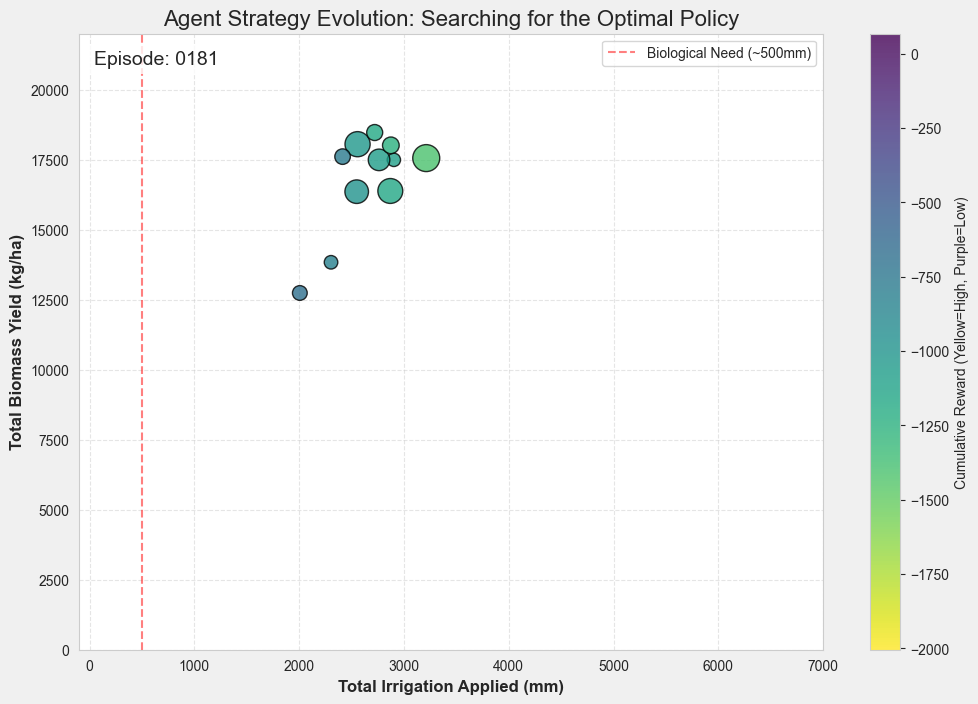

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import os
import numpy as np

# ==========================================
# 👇 CONFIGURATION: TWEAK PARAMETERS HERE 👇
# ==========================================
# Raw string (r"...") for Windows paths
LOG_PATTERN = r"D:\Final-Year-Project\VERSION-ONE-next\randomized_env_workspace\episode_final\episode_*_log.csv"
OUTPUT_FILENAME = "agent_learning_evolution.gif"

# Animation Speed
FRAMES_PER_SECOND = 15  # Higher = Faster animation
TRAIL_LENGTH = 10       # How many past dots to keep visible (The "Tail")

# Visual Limits (Adjust based on your data)
MAX_IRRIGATION = 7000   # X-Axis Limit
MAX_YIELD = 22000       # Y-Axis Limit

# Bubble Size Scale (Rainfall)
MIN_BUBBLE_SIZE = 50    # Size for dry years
MAX_BUBBLE_SIZE = 400   # Size for heavy rain years
# ==========================================

def load_data():
    """Reads all CSV logs and extracts key metrics."""
    files = sorted(glob.glob(LOG_PATTERN))
    print(f"📂 Found {len(files)} log files. Processing...")
    
    data = []
    for f in files:
        try:
            # --- PATH FIX: Get just the filename ---
            filename = os.path.basename(f)
            # Split "episode_0001_log.csv" -> ["episode", "0001", "log.csv"]
            ep_num = int(filename.split('_')[1])

            df = pd.read_csv(f)
            
            # Key Metrics Extraction
            irrigation = df['action_irrigation_mm'].sum()
            yield_kg = df['total_biomass'].max()
            reward = df['reward'].sum()
            rain = df['rainfall_7day'].mean()
            
            data.append({
                'Episode': ep_num,
                'Irrigation': irrigation,
                'Yield': yield_kg,
                'Reward': reward,
                'Rain': rain
            })
        except Exception as e:
            print(f"⚠️ Error reading {filename}: {e}")
            
    if not data:
        print("❌ No data found! Check your LOG_PATTERN path.")
        return pd.DataFrame()
        
    # Create DataFrame and sort
    df = pd.DataFrame(data).sort_values('Episode')
    
    # --- TYPE FIX: Force Episode to be Int ---
    df['Episode'] = df['Episode'].astype(int)
    
    return df

def update_plot(frame_idx, df, scat, text_label, ax):
    """Update function for the animation."""
    # Get current episode (and force int just in case)
    current_ep = int(df.iloc[frame_idx]['Episode'])
    
    # Slice data for the trail
    start_idx = max(0, frame_idx - TRAIL_LENGTH)
    trail_data = df.iloc[start_idx : frame_idx + 1]
    
    # 1. Update Positions (X, Y)
    offsets = trail_data[['Irrigation', 'Yield']].values
    scat.set_offsets(offsets)
    
    # 2. Update Colors (Reward)
    scat.set_array(trail_data['Reward'].values)
    
    # 3. Update Sizes (Rainfall)
    rain_vals = trail_data['Rain'].values
    rain_min = df['Rain'].min()
    rain_max = df['Rain'].max()
    
    if rain_max > rain_min:
        rain_norm = (rain_vals - rain_min) / (rain_max - rain_min)
    else:
        rain_norm = 0.5
        
    sizes = MIN_BUBBLE_SIZE + (rain_norm * (MAX_BUBBLE_SIZE - MIN_BUBBLE_SIZE))
    scat.set_sizes(sizes)
    
    # Update Title (Safe integer formatting)
    text_label.set_text(f"Episode: {current_ep:04d}")
    
    return scat, text_label

def create_animation():
    df = load_data()
    if df.empty: return

    # Setup Figure
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('#f0f0f0') 
    ax.set_facecolor('white')
    
    # Axis Labels & Limits
    ax.set_xlim(-100, MAX_IRRIGATION)
    ax.set_ylim(0, MAX_YIELD)
    ax.set_xlabel('Total Irrigation Applied (mm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Total Biomass Yield (kg/ha)', fontsize=12, fontweight='bold')
    ax.set_title('Agent Strategy Evolution: Searching for the Optimal Policy', fontsize=16)
    
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axvline(x=500, color='red', linestyle='--', alpha=0.5, label='Biological Need (~500mm)')
    ax.legend(loc='upper right')

    # Initial Scatter Plot
    scat = ax.scatter([], [], c=[], cmap='viridis_r', alpha=0.8, edgecolors='black')
    
    # Colorbar
    cbar = plt.colorbar(scat, ax=ax)
    cbar.set_label('Cumulative Reward (Yellow=High, Purple=Low)', fontsize=10)
    scat.set_clim(df['Reward'].quantile(0.05), df['Reward'].quantile(0.95))

    # Episode Label
    episode_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14, 
                           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Run Animation
    print(f"🎬 Generating GIF ({len(df)} frames)...")
    
    # Note: save_count ensures proper frame count calculation
    ani = animation.FuncAnimation(
        fig, update_plot, 
        frames=len(df), 
        fargs=(df, scat, episode_text, ax),
        interval=1000/FRAMES_PER_SECOND, 
        blit=False,
        save_count=len(df) 
    )

    # Save
    ani.save(OUTPUT_FILENAME, writer='pillow', fps=FRAMES_PER_SECOND)
    print(f"✅ Success! Animation saved to: {OUTPUT_FILENAME}")

if __name__ == "__main__":
    create_animation()

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.animation as animation
# import glob
# import os
# import numpy as np

# # ==========================================
# # 👇 CONFIGURATION 👇
# # ==========================================
# # Use raw string (r"...") for Windows paths if needed
# LOG_PATTERN = r"D:\Final-Year-Project\VERSION-ONE-next\randomized_env_workspace\episode_final/episode_*_log.csv"
# OUTPUT_IMAGE = "final_learning_report.png"
# OUTPUT_GIF = "agent_evolution.gif"
# FRAMES_PER_SECOND = 15
# TRAIL_LENGTH = 15
# # ==========================================

# def load_all_data():
#     """Robustly loads all CSV logs."""
#     files = sorted(glob.glob(LOG_PATTERN))
#     # Fallback to local dir if path not found (for easy testing)
#     if not files:
#         files = sorted(glob.glob("episode_*_log.csv"))
    
#     print(f"📂 Found {len(files)} log files. Processing...")
    
#     summary_data = []
    
#     for f in files:
#         try:
#             # Robust filename parsing
#             filename = os.path.basename(f)
#             ep_num = int(filename.split('_')[1])
            
#             df = pd.read_csv(f)
            
#             # Key Metrics
#             total_rain = df['rainfall_7day'].mean() 
#             total_irrigation = df['action_irrigation_mm'].sum()
#             final_yield = df['total_biomass'].max()
#             total_reward = df['reward'].sum()
            
#             # Derived Metrics
#             water_efficiency = final_yield / (total_irrigation + total_rain + 1)
            
#             summary_data.append({
#                 'Episode': ep_num,
#                 'Rain': total_rain,
#                 'Irrigation': total_irrigation,
#                 'Yield': final_yield,
#                 'Reward': total_reward,
#                 'Efficiency': water_efficiency
#             })
#         except Exception as e:
#             pass # Skip bad files silently
            
#     df = pd.DataFrame(summary_data).sort_values('Episode')
#     df['Episode'] = df['Episode'].astype(int) # Force int for formatting
#     return df

# def generate_static_report(df):
#     """Creates the 4-Panel Evolution Plot."""
#     print("📊 Generating Static Report...")
#     sns.set_style("whitegrid")
#     fig, axes = plt.subplots(2, 2, figsize=(16, 12))
#     fig.suptitle(f'AI Agent Intelligence Evolution (Episodes 1-{len(df)})', fontsize=20, weight='bold')

#     # 1. Reward Curve (Smoothed)
#     df['Reward_Rolling'] = df['Reward'].rolling(window=10, min_periods=1).mean()
#     sns.lineplot(data=df, x='Episode', y='Reward', ax=axes[0, 0], alpha=0.3, color='gray')
#     sns.lineplot(data=df, x='Episode', y='Reward_Rolling', ax=axes[0, 0], color='green', linewidth=2)
#     axes[0, 0].set_title('A. Learning Curve (Cumulative Reward)', fontsize=14)
#     axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.3)

#     # 2. Water Usage
#     df['Irrigation_Rolling'] = df['Irrigation'].rolling(window=10, min_periods=1).mean()
#     sns.scatterplot(data=df, x='Episode', y='Irrigation', ax=axes[0, 1], alpha=0.5, color='blue', s=20)
#     sns.lineplot(data=df, x='Episode', y='Irrigation_Rolling', ax=axes[0, 1], color='darkblue', linewidth=2)
#     axes[0, 1].set_title('B. Water Usage Strategy (mm)', fontsize=14)
#     # Annotate phases
#     if len(df) > 50:
#         axes[0, 1].axvline(30, color='red', linestyle='--', alpha=0.5)
#         axes[0, 1].text(5, df['Irrigation'].max()*0.8, "Lazy", color='red')
#         axes[0, 1].text(35, df['Irrigation'].max()*0.8, "Panic", color='red')
#         axes[0, 1].text(len(df)-20, df['Irrigation'].max()*0.8, "Smart", color='green')

#     # 3. Yield Stability
#     df['Yield_Rolling'] = df['Yield'].rolling(window=10, min_periods=1).mean()
#     sns.lineplot(data=df, x='Episode', y='Yield', ax=axes[1, 0], alpha=0.3, color='orange')
#     sns.lineplot(data=df, x='Episode', y='Yield_Rolling', ax=axes[1, 0], color='darkorange', linewidth=2)
#     axes[1, 0].set_title('C. Crop Yield Stability (kg/ha)', fontsize=14)

#     # 4. Adaptation (Rain vs Irr)
#     sc = axes[1, 1].scatter(df['Rain'], df['Irrigation'], 
#                             c=df['Episode'], cmap='viridis', alpha=0.8, s=60)
#     axes[1, 1].set_title('D. Adaptation: Does it water less when it rains?', fontsize=14)
#     axes[1, 1].set_xlabel('Natural Rain (mm)')
#     axes[1, 1].set_ylabel('AI Irrigation (mm)')
#     plt.colorbar(sc, ax=axes[1, 1], label='Episode #')

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.savefig(OUTPUT_IMAGE)
#     print(f"✅ Static Report Saved: {OUTPUT_IMAGE}")

# def generate_gif(df):
#     """Creates the animated learning GIF."""
#     print("🎬 Generating Animation (this takes a moment)...")
#     fig, ax = plt.subplots(figsize=(10, 7))
    
#     # Setup Plot
#     ax.set_xlim(-100, 7000)
#     ax.set_ylim(0, 22000)
#     ax.set_xlabel('Irrigation (mm)', fontweight='bold')
#     ax.set_ylabel('Yield (kg/ha)', fontweight='bold')
#     ax.set_title('Agent Search Strategy', fontsize=16)
#     ax.grid(True, linestyle='--', alpha=0.5)
    
#     # Elements to animate
#     scat = ax.scatter([], [], c=[], cmap='viridis_r', alpha=0.8, edgecolors='k')
#     text_label = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14, 
#                          bbox=dict(facecolor='white', alpha=0.8))
    
#     # Colorbar
#     cbar = plt.colorbar(scat, ax=ax)
#     cbar.set_label('Reward Score')
#     scat.set_clim(df['Reward'].quantile(0.05), df['Reward'].quantile(0.95))

#     def update(frame_idx):
#         # Current Ep
#         current_ep = int(df.iloc[frame_idx]['Episode'])
        
#         # Trail Data
#         start = max(0, frame_idx - TRAIL_LENGTH)
#         trail = df.iloc[start : frame_idx + 1]
        
#         # Update
#         scat.set_offsets(trail[['Irrigation', 'Yield']].values)
#         scat.set_array(trail['Reward'].values)
        
#         # Size by Rain (Small dot = Dry, Big dot = Wet)
#         sizes = 50 + (trail['Rain'] / (df['Rain'].max()+1) * 300)
#         scat.set_sizes(sizes)
        
#         text_label.set_text(f"Episode: {current_ep:04d}")
#         return scat, text_label

#     ani = animation.FuncAnimation(fig, update, frames=len(df), interval=1000/FRAMES_PER_SECOND, blit=False)
#     ani.save(OUTPUT_GIF, writer='pillow', fps=FRAMES_PER_SECOND)
#     print(f"✅ GIF Saved: {OUTPUT_GIF}")

# def print_summary(df):
#     """Prints the Executive Summary."""
#     print("\n" + "="*40)
#     print("🚀 EXECUTIVE SUMMARY (180 EPISODES)")
#     print("="*40)
    
#     # 1. Compare First 20 vs Last 20 Episodes
#     first_20 = df.head(20)
#     last_20 = df.tail(20)
    
#     avg_irr_start = first_20['Irrigation'].mean()
#     avg_irr_end = last_20['Irrigation'].mean()
#     avg_yield_start = first_20['Yield'].mean()
#     avg_yield_end = last_20['Yield'].mean()
    
#     print(f"💧 Water Usage Change: {avg_irr_start:.0f} mm -> {avg_irr_end:.0f} mm")
#     if avg_irr_end < avg_irr_start:
#         print(f"   (Saved {avg_irr_start - avg_irr_end:.0f} mm per season!)")
    
#     print(f"🌾 Yield Stability:    {avg_yield_start:.0f} kg -> {avg_yield_end:.0f} kg")
    
#     # 2. Find the "Best" Episode (Smartest)
#     # Defined as: High Yield (>12000) with Minimum Water
#     smart_candidates = df[df['Yield'] > 12000]
#     if not smart_candidates.empty:
#         best_ep = smart_candidates.loc[smart_candidates['Irrigation'].idxmin()]
#         print("\n🏆 BEST SMART EPISODE (Max Efficiency):")
#         print(f"   • Episode: #{int(best_ep['Episode'])}")
#         print(f"   • Rain:    {best_ep['Rain']:.1f} mm (Condition)")
#         print(f"   • Water:   {best_ep['Irrigation']:.1f} mm (Action)")
#         print(f"   • Yield:   {best_ep['Yield']:.0f} kg/ha (Result)")
#         print(f"   • Logic:   Achieved massive yield using minimal water.")
    
#     print("="*40)

# if __name__ == "__main__":
#     df = load_all_data()
#     if not df.empty:
#         print_summary(df)
#         generate_static_report(df)
#         generate_gif(df)
#     else:
#         print("❌ No data found.")

📂 Processing 180 episodes for Heatmap...
✅ DNA Heatmap saved to: strategy_dna_heatmap.png


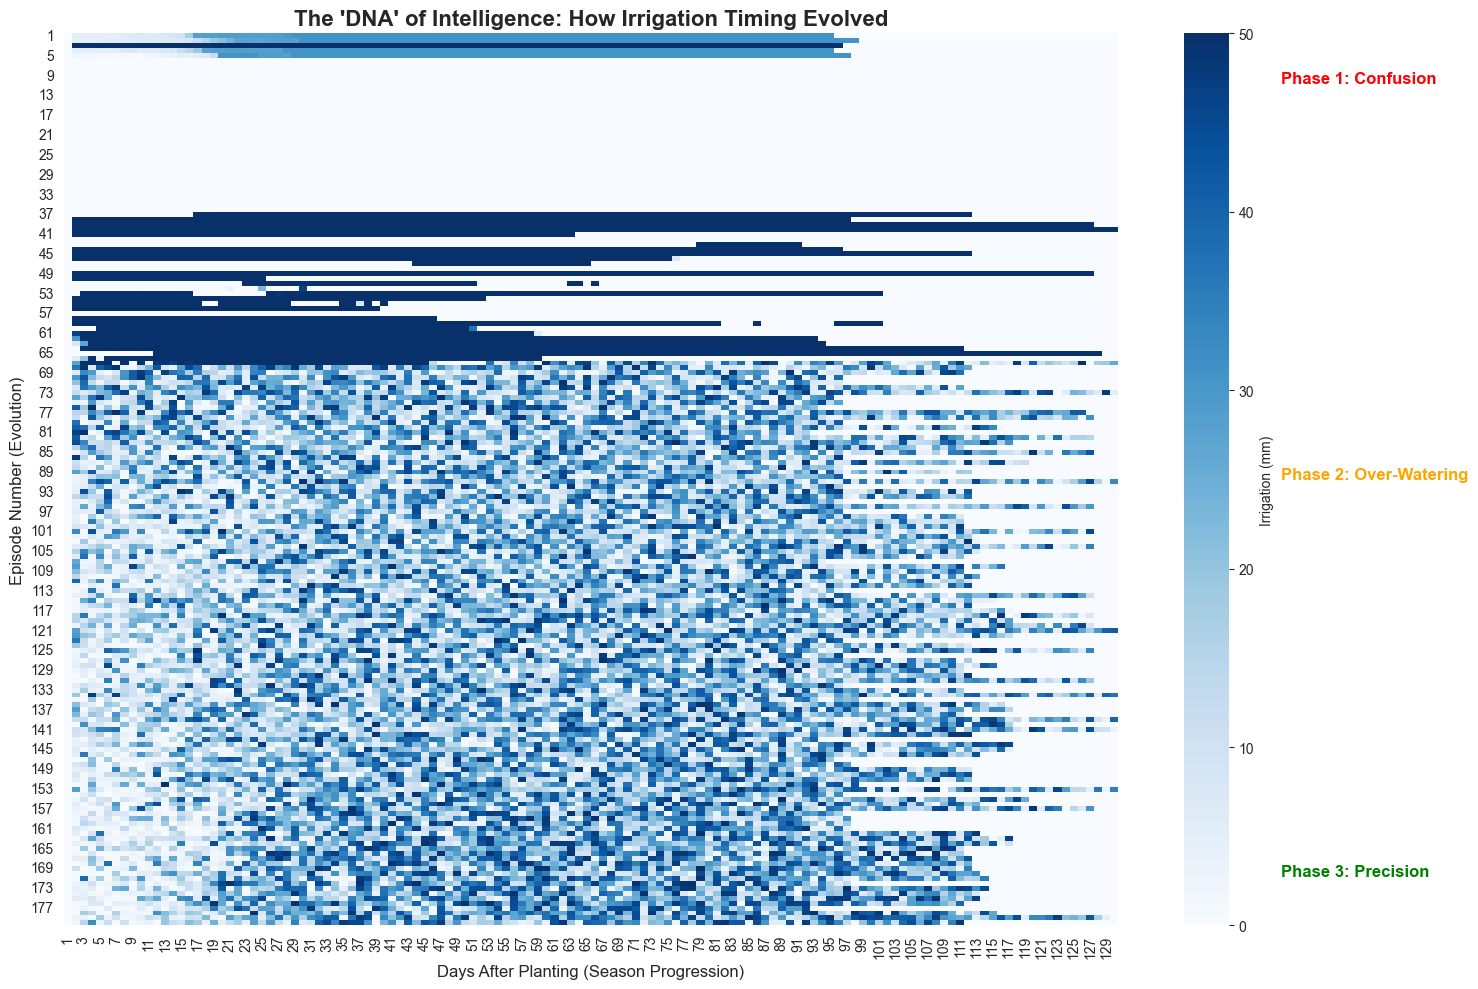

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# --- CONFIG ---
# Use raw string for Windows paths
LOG_PATTERN = r"./randomized_env_workspace/episode_logs/episode_*_log.csv"
OUTPUT_FILE = "strategy_dna_heatmap.png"

def generate_heatmap():
    files = sorted(glob.glob(LOG_PATTERN))
    
    # Check if files exist
    if not files:
        # Try local fallback
        files = sorted(glob.glob("episode_*_log.csv"))
        if not files:
            print("❌ No files found.")
            return

    print(f"📂 Processing {len(files)} episodes for Heatmap...")

    # We need to build a big matrix: 
    # Rows = Episodes, Columns = Days After Planting (DAP)
    # Values = Irrigation Amount
    
    all_data = []

    for f in files:
        try:
            filename = os.path.basename(f)
            ep_num = int(filename.split('_')[1])
            
            df = pd.read_csv(f)
            
            # We want to keep every single day's action
            # Make sure we have DAP and Action columns
            if 'DAP' in df.columns and 'action_irrigation_mm' in df.columns:
                temp_df = df[['DAP', 'action_irrigation_mm']].copy()
                temp_df['Episode'] = ep_num
                all_data.append(temp_df)
        except Exception:
            pass

    if not all_data:
        print("❌ Could not extract daily data.")
        return

    # Combine into one huge table
    big_df = pd.concat(all_data)

    # Pivot the table for the Heatmap
    # Index = Episode, Columns = DAP, Values = Irrigation
    heatmap_data = big_df.pivot_table(index='Episode', columns='DAP', values='action_irrigation_mm', fill_value=0)

    # Sort index to ensure episodes go 1 -> 180
    heatmap_data = heatmap_data.sort_index()

    # --- PLOTTING ---
    plt.figure(figsize=(15, 10))
    
    # Create Heatmap
    # cmap='Blues' (White = Dry, Dark Blue = Wet)
    # vmin=0, vmax=50 (Assuming max irrigation action is 50mm)
    sns.heatmap(heatmap_data, cmap="Blues", vmin=0, vmax=50, cbar_kws={'label': 'Irrigation (mm)'})

    plt.title("The 'DNA' of Intelligence: How Irrigation Timing Evolved", fontsize=16, fontweight='bold')
    plt.ylabel("Episode Number (Evolution)", fontsize=12)
    plt.xlabel("Days After Planting (Season Progression)", fontsize=12)
    
    # Add phase annotations
    plt.text(150, 10, "Phase 1: Confusion", color='red', fontsize=12, fontweight='bold')
    plt.text(150, len(heatmap_data)/2, "Phase 2: Over-Watering", color='orange', fontsize=12, fontweight='bold')
    plt.text(150, len(heatmap_data)-10, "Phase 3: Precision", color='green', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig(OUTPUT_FILE, dpi=300)
    print(f"✅ DNA Heatmap saved to: {OUTPUT_FILE}")

if __name__ == "__main__":
    generate_heatmap()

📂 Scanning 180 files to find best examples...


C:\Users\gurup\AppData\Local\Temp\ipykernel_35136\3452592869.py:92: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gurup\AppData\Local\Temp\ipykernel_35136\3452592869.py:92: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gurup\AppData\Local\Temp\ipykernel_35136\3452592869.py:93: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.savefig(OUTPUT_FILE, dpi=300)
C:\Users\gurup\AppData\Local\Temp\ipykernel_35136\3452592869.py:93: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.savefig(OUTPUT_FILE, dpi=300)


✅ Comparison saved to: daily_strategy_comparison.png


d:\Final-Year-Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Final-Year-Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


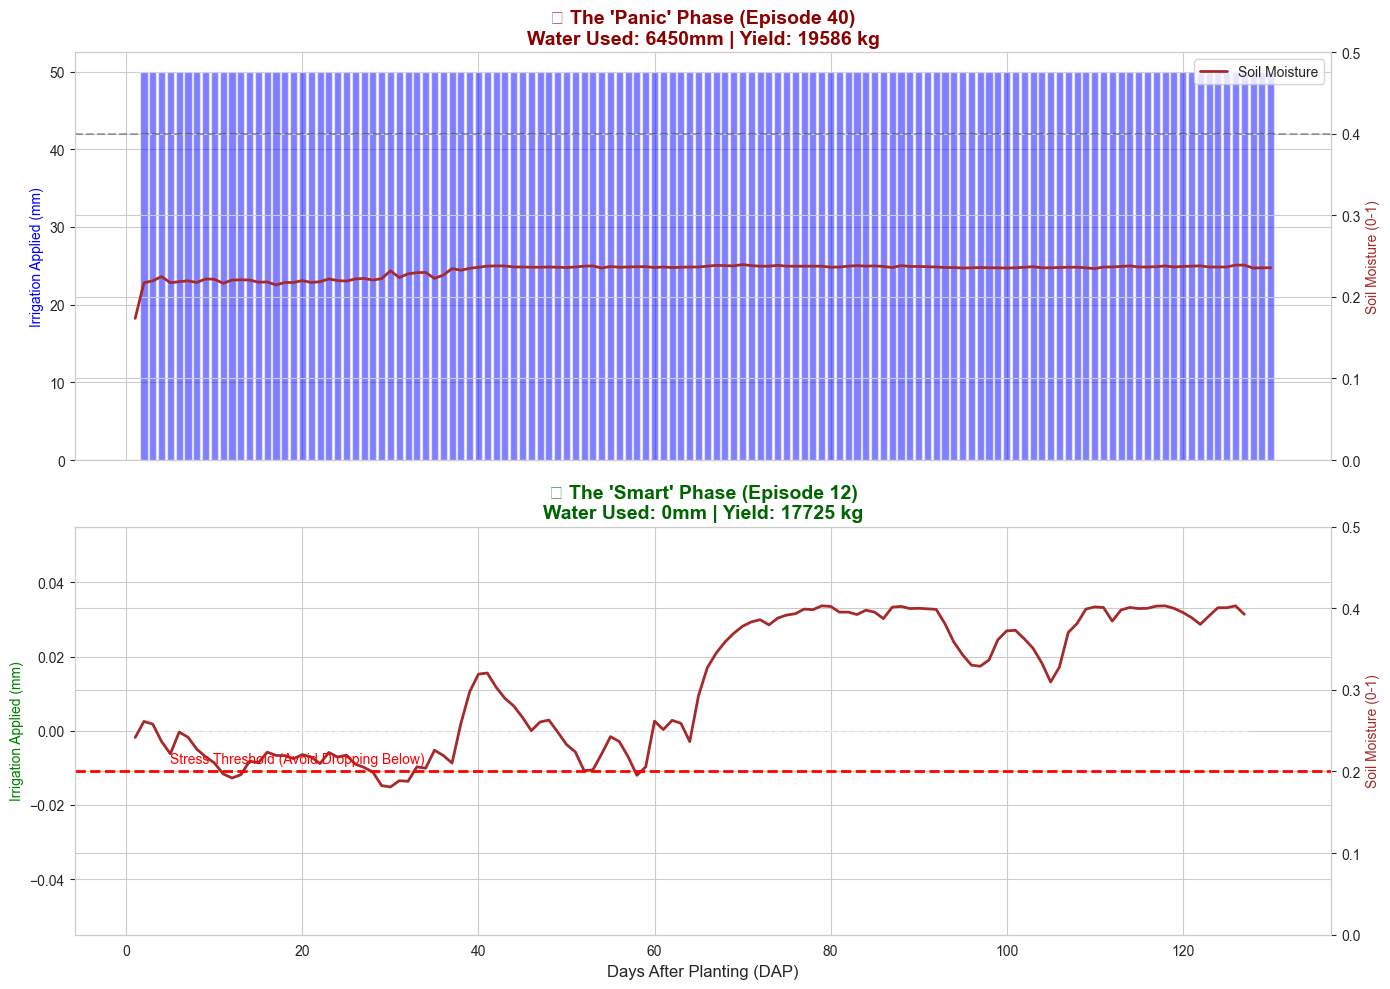

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# --- CONFIG ---
LOG_PATTERN = r"./randomized_env_workspace/episode_logs/episode_*_log.csv"
OUTPUT_FILE = "daily_strategy_comparison.png"

def get_daily_data(files):
    """Finds a 'Panic' episode (High Water) and 'Smart' episode (High Yield, Low Water)."""
    summary = []
    
    print(f"📂 Scanning {len(files)} files to find best examples...")
    
    for f in files:
        try:
            df = pd.read_csv(f)
            ep_num = int(os.path.basename(f).split('_')[1])
            summary.append({
                'Episode': ep_num,
                'Irrigation': df['action_irrigation_mm'].sum(),
                'Yield': df['total_biomass'].max(),
                'File': f
            })
        except:
            pass
            
    df_sum = pd.DataFrame(summary)
    
    # 1. Identify "Panic" (High Irrigation)
    # We define panic as high water usage
    panic_row = df_sum.sort_values('Irrigation', ascending=False).iloc[0]
    
    # 2. Identify "Smart" (High Yield but Low Irrigation)
    # Filter for good yields first, then find min water
    good_yields = df_sum[df_sum['Yield'] > 12000]
    if not good_yields.empty:
        smart_row = good_yields.sort_values('Irrigation', ascending=True).iloc[0]
    else:
        smart_row = df_sum.sort_values('Irrigation', ascending=True).iloc[0]
        
    return panic_row, smart_row

def plot_comparison(panic_meta, smart_meta):
    """Plots the daily timelines."""
    
    # Load the actual daily logs
    df_panic = pd.read_csv(panic_meta['File'])
    df_smart = pd.read_csv(smart_meta['File'])
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # --- PLOT 1: THE PANIC AGENT ---
    ax1 = axes[0]
    # Bar chart for Irrigation
    ax1.bar(df_panic['DAP'], df_panic['action_irrigation_mm'], color='blue', alpha=0.5, label='Irrigation (mm)')
    # Line for Soil Water
    ax1_twin = ax1.twinx()
    sns.lineplot(x=df_panic['DAP'], y=df_panic['soil_water_content_0_30cm'], ax=ax1_twin, color='brown', linewidth=2, label='Soil Moisture')
    
    ax1.set_title(f"❌ The 'Panic' Phase (Episode {int(panic_meta['Episode'])})\n"
                  f"Water Used: {panic_meta['Irrigation']:.0f}mm | Yield: {panic_meta['Yield']:.0f} kg", fontsize=14, fontweight='bold', color='darkred')
    ax1.set_ylabel("Irrigation Applied (mm)", color='blue')
    ax1_twin.set_ylabel("Soil Moisture (0-1)", color='brown')
    ax1_twin.set_ylim(0, 0.5)
    
    # Add Saturation Line
    ax1_twin.axhline(0.4, color='black', linestyle='--', alpha=0.3, label='Saturation')

    # --- PLOT 2: THE SMART AGENT ---
    ax2 = axes[1]
    # Bar chart for Irrigation
    ax2.bar(df_smart['DAP'], df_smart['action_irrigation_mm'], color='green', alpha=0.6, label='Irrigation (mm)')
    # Line for Soil Water
    ax2_twin = ax2.twinx()
    sns.lineplot(x=df_smart['DAP'], y=df_smart['soil_water_content_0_30cm'], ax=ax2_twin, color='brown', linewidth=2)
    
    ax2.set_title(f"✅ The 'Smart' Phase (Episode {int(smart_meta['Episode'])})\n"
                  f"Water Used: {smart_meta['Irrigation']:.0f}mm | Yield: {smart_meta['Yield']:.0f} kg", fontsize=14, fontweight='bold', color='darkgreen')
    ax2.set_xlabel("Days After Planting (DAP)", fontsize=12)
    ax2.set_ylabel("Irrigation Applied (mm)", color='green')
    ax2_twin.set_ylabel("Soil Moisture (0-1)", color='brown')
    ax2_twin.set_ylim(0, 0.5)
    
    # Add Critical Threshold Line (Wilting Point approx 0.18-0.20)
    ax2_twin.axhline(0.20, color='red', linestyle='--', linewidth=2, label='Critical Stress Line')
    ax2_twin.text(5, 0.21, "Stress Threshold (Avoid Dropping Below)", color='red', fontsize=10)

    plt.tight_layout()
    plt.savefig(OUTPUT_FILE, dpi=300)
    print(f"✅ Comparison saved to: {OUTPUT_FILE}")

if __name__ == "__main__":
    files = sorted(glob.glob(LOG_PATTERN))
    if not files:
        files = sorted(glob.glob("episode_*_log.csv")) # Fallback
        
    if files:
        panic, smart = get_daily_data(files)
        plot_comparison(panic, smart)
    else:
        print("❌ No files found.")

💧 Analyzing Water Use Efficiency for 180 episodes...
✅ Fixed Efficiency Report saved to: wue_contour_report_v2.png


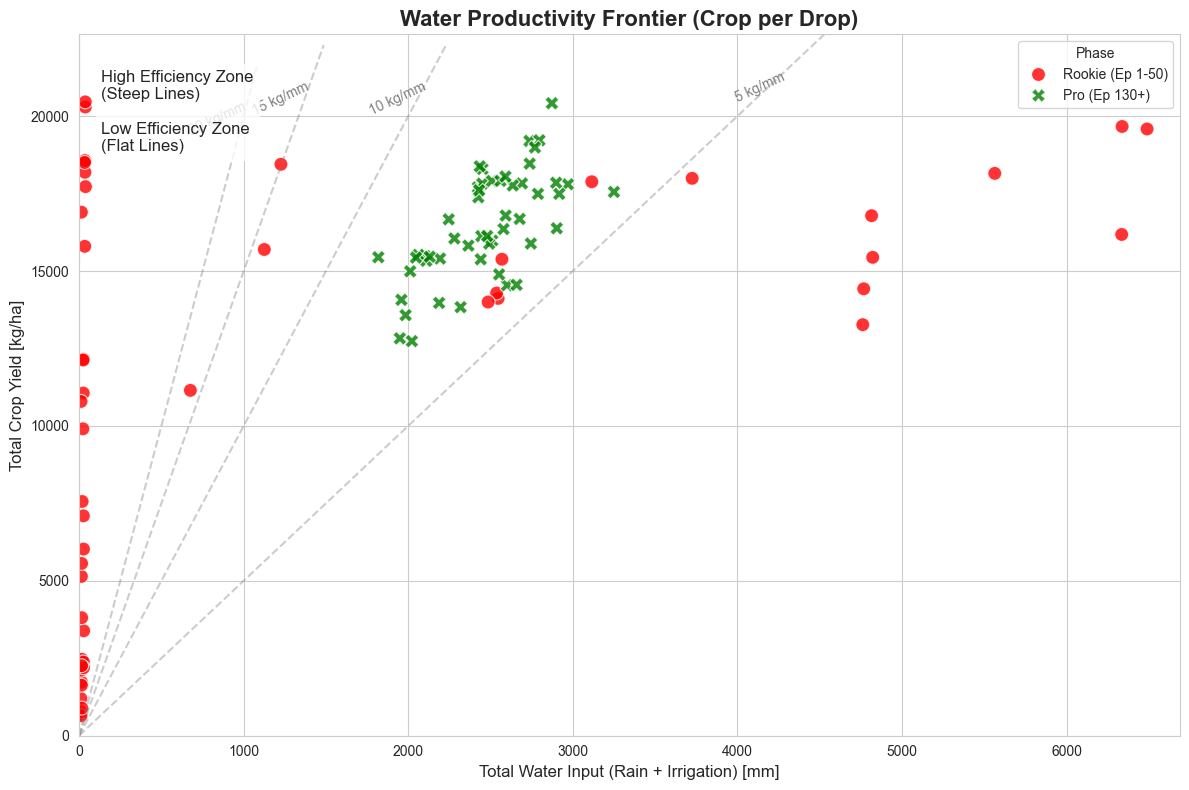

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# --- CONFIG ---
LOG_PATTERN = r"./randomized_env_workspace/episode_logs/episode_*_log.csv"
OUTPUT_FILE = "wue_contour_report_v2.png"

def generate_wue_report():
    files = sorted(glob.glob(LOG_PATTERN))
    if not files: files = sorted(glob.glob("episode_*_log.csv"))
    
    data = []
    print(f"💧 Analyzing Water Use Efficiency for {len(files)} episodes...")

    for f in files:
        try:
            ep_num = int(os.path.basename(f).split('_')[1])
            df = pd.read_csv(f)
            
            yield_kg = df['total_biomass'].max()
            irrigation_mm = df['action_irrigation_mm'].sum()
            rain_mm = df['rainfall_7day'].mean() 
            total_water = irrigation_mm + rain_mm + 1 # +1 to prevent div/0
            
            if ep_num <= 50: phase = "Rookie (Ep 1-50)"
            elif ep_num >= 130: phase = "Pro (Ep 130+)"
            else: phase = "Learning"

            data.append({
                'Episode': ep_num,
                'Total Water (mm)': total_water,
                'Yield (kg)': yield_kg,
                'Phase': phase
            })
        except:
            pass

    df = pd.DataFrame(data)
    df_compare = df[df['Phase'] != "Learning"] 

    # --- PLOTTING ---
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))

    # 1. Scatter Plot
    sns.scatterplot(data=df_compare, x='Total Water (mm)', y='Yield (kg)', 
                    hue='Phase', style='Phase', s=100, alpha=0.8, palette=["red", "green"], ax=ax)

    # 2. Add "Efficiency Contour Lines" (The Fan)
    # Define hard limits for the graph so it doesn't zoom out to infinity
    MAX_WATER = df['Total Water (mm)'].max() + 200
    MAX_YIELD = df['Yield (kg)'].max() + 2000
    
    ax.set_xlim(0, MAX_WATER)
    ax.set_ylim(0, MAX_YIELD)
    
    x_vals = np.linspace(0, MAX_WATER, 100)
    levels = [5, 10, 15, 20] # Realistic agricultural efficiency levels
    
    for level in levels:
        y_vals = x_vals * level
        
        # Only plot line segments that are within the visible graph
        valid_idx = y_vals <= MAX_YIELD
        if np.any(valid_idx):
            ax.plot(x_vals[valid_idx], y_vals[valid_idx], '--', color='gray', alpha=0.4)
            
            # Place label safely inside the graph
            # Find the last valid point (top right of the line segment)
            last_x = x_vals[valid_idx][-1]
            last_y = y_vals[valid_idx][-1]
            
            # Nudge label slightly left/down so it doesn't get cut off
            ax.text(last_x * 0.95, last_y * 0.95, f'{level} kg/mm', 
                    color='gray', fontsize=10, rotation=25, ha='right', va='top')

    ax.set_title("Water Productivity Frontier (Crop per Drop)", fontsize=16, fontweight='bold')
    ax.set_xlabel("Total Water Input (Rain + Irrigation) [mm]", fontsize=12)
    ax.set_ylabel("Total Crop Yield [kg/ha]", fontsize=12)
    
    # Add explanation box (Using relative coordinates 0-1 so it never moves out)
    text_str = ("High Efficiency Zone\n(Steep Lines)\n\nLow Efficiency Zone\n(Flat Lines)")
    ax.text(0.02, 0.95, text_str, transform=ax.transAxes, 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8), va='top')

    plt.tight_layout()
    plt.savefig(OUTPUT_FILE, dpi=300)
    print(f"✅ Fixed Efficiency Report saved to: {OUTPUT_FILE}")

if __name__ == "__main__":
    generate_wue_report()